# Training

In [1]:
%%capture
%pip install -r requirements.txt

In [2]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import witnesses
import mlflow

2024-05-21 14:20:05.110794: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-21 14:20:05.140040: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 14:20:05.608573: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [4]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

Epoch 1/10


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-21 14:20:06.707769: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-05-21 14:20:06.707788: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: faical-ubuntu
2024-05-21 14:20:06.707791: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: faical-ubuntu
2024-05-21 14:20:06.707903: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.171.4
2024-05-21 14:20:06.707913: I external/local_xla/xla/stre

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6758 - loss: 0.6052 - val_accuracy: 0.8400 - val_loss: 0.3991
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.8876 - loss: 0.3111 - val_accuracy: 0.9533 - val_loss: 0.1597
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9535 - loss: 0.1420 - val_accuracy: 0.9833 - val_loss: 0.1025
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9720 - loss: 0.0920 - val_accuracy: 0.9817 - val_loss: 0.0756
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9789 - loss: 0.0689 - val_accuracy: 0.9858 - val_loss: 0.0639
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9848 - loss: 0.0673 - val_accuracy: 0.9908 - val_loss: 0.0569
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.9873 - loss: 0.0663 - val_accuracy: 0.9900 - val_loss: 0.0564
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.9903 - loss: 0.0429 - val_accuracy:

2024/05/21 14:20:08 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.9917 - loss: 0.0497


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'QuantumStateClassifier-CONCURRENCE' already exists. Creating a new version of this model...
2024/05/21 14:20:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CONCURRENCE, version 17
Created version '17' of model 'QuantumStateClassifier-CONCURRENCE'.


Model saved in run e8192fb4d7554b87b37d53099f2c05c9


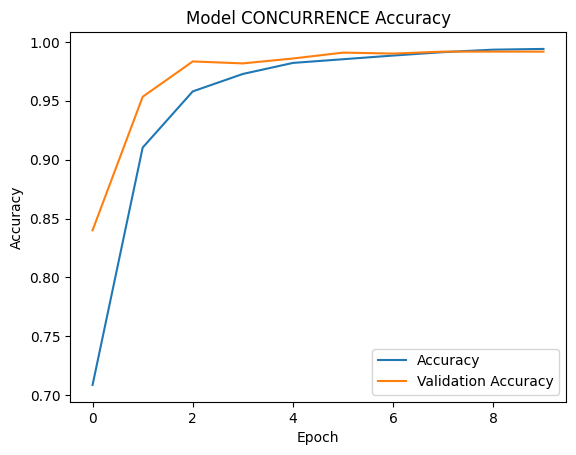

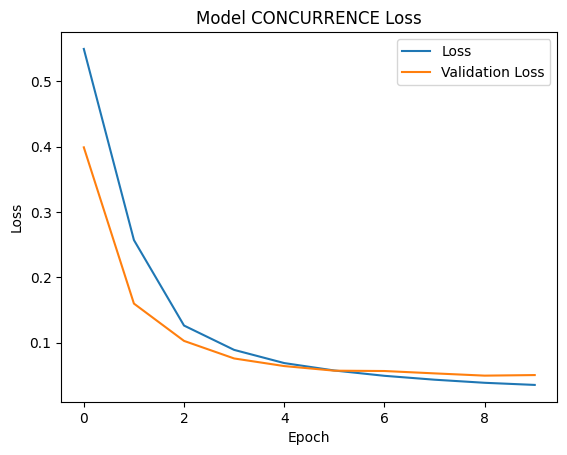

Epoch 1/10


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6765 - loss: 0.6020 - val_accuracy: 0.8358 - val_loss: 0.3998
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.9012 - loss: 0.3103 - val_accuracy: 0.9492 - val_loss: 0.1453
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.9553 - loss: 0.1306 - val_accuracy: 0.9833 - val_loss: 0.0787
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.9726 - loss: 0.0793 - val_accuracy: 0.9875 - val_loss: 0.0525
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.9796 - loss: 0.0616 - val_accuracy: 0.9933 - val_loss: 0.0425
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9871 - loss: 0.0447 - val_accuracy: 0.9917 - val_loss: 0.0300
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.9913 - loss: 0.0302 - val_accuracy: 0.9942 - val_loss: 0.0265
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.9940 - loss: 0.0223 - val_accuracy:

2024/05/21 14:20:12 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.9959 - loss: 0.0165


Registered model 'QuantumStateClassifier-ENTROPY' already exists. Creating a new version of this model...
2024/05/21 14:20:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-ENTROPY, version 14


Model saved in run dc9555a067204d29a02fc3a3fff5f135


Created version '14' of model 'QuantumStateClassifier-ENTROPY'.


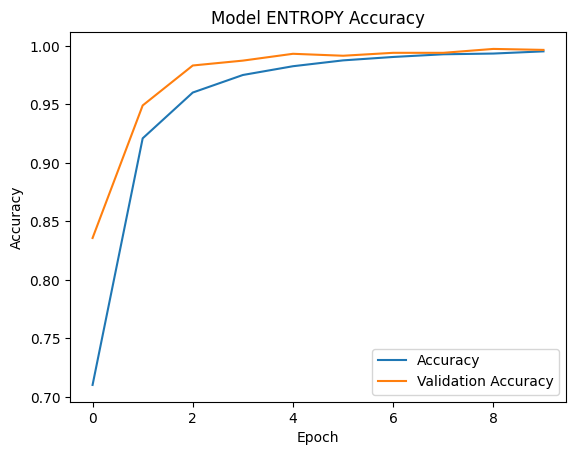

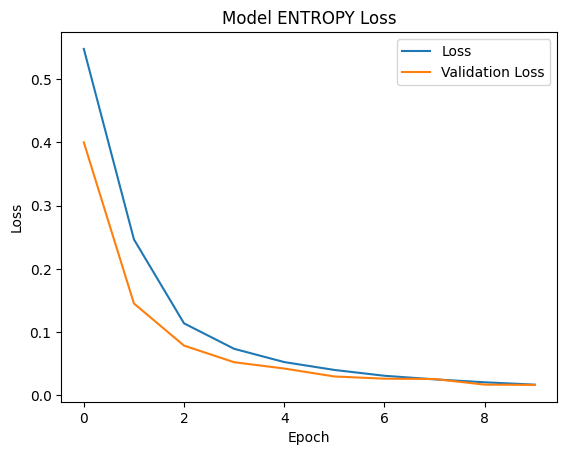

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6641 - loss: 0.6082 - val_accuracy: 0.8850 - val_loss: 0.3515
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.9098 - loss: 0.2698 - val_accuracy: 0.9608 - val_loss: 0.1242
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.9543 - loss: 0.1228 - val_accuracy: 0.9833 - val_loss: 0.0677
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.9744 - loss: 0.0793 - val_accuracy: 0.9875 - val_loss: 0.0493
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.9873 - loss: 0.0439 - val_accuracy: 0.9908 - val_loss: 0.0347
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.9885 - loss: 0.0354 - val_accuracy: 0.9925 - val_loss: 0.0274
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.9941 - loss: 0.0281 - val_accuracy: 0.9942 - val_loss: 0.0242
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.9929 - loss: 0.0227 - va

2024/05/21 14:20:15 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.9959 - loss: 0.0149


Registered model 'QuantumStateClassifier-NEGATIVITY' already exists. Creating a new version of this model...
2024/05/21 14:20:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-NEGATIVITY, version 14


Model saved in run 8c8d3c37aec842db94da8d29a3301cdc


Created version '14' of model 'QuantumStateClassifier-NEGATIVITY'.


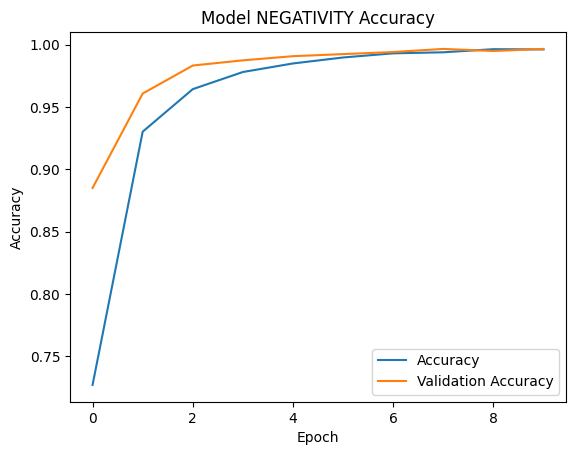

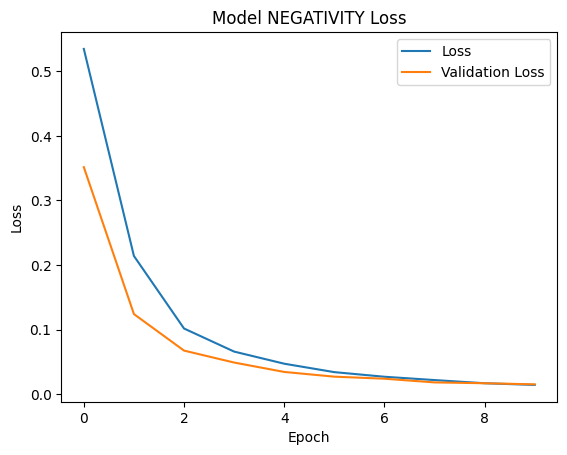

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - accuracy: 0.7248 - loss: 0.5800 - val_accuracy: 0.7517 - val_loss: 0.4803
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.7870 - loss: 0.4411 - val_accuracy: 0.8375 - val_loss: 0.3664
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.8584 - loss: 0.3268 - val_accuracy: 0.8767 - val_loss: 0.2724
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.9037 - loss: 0.2396 - val_accuracy: 0.9242 - val_loss: 0.2146
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.9352 - loss: 0.1883 - val_accuracy: 0.9508 - val_loss: 0.1671
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.9611 - loss: 0.1472 - val_accuracy: 0.9517 - val_loss: 0.1387
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.9699 - loss: 0.1186 - val_accuracy: 0.9542 - val_loss: 0.1233
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9745 - loss: 0.0952 -

2024/05/21 14:20:19 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.9864 - loss: 0.0765


Registered model 'QuantumStateClassifier-CHSH' already exists. Creating a new version of this model...
2024/05/21 14:20:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CHSH, version 34


Model saved in run 9ecb45ce7de948058bcef1a7c8787596


Created version '34' of model 'QuantumStateClassifier-CHSH'.


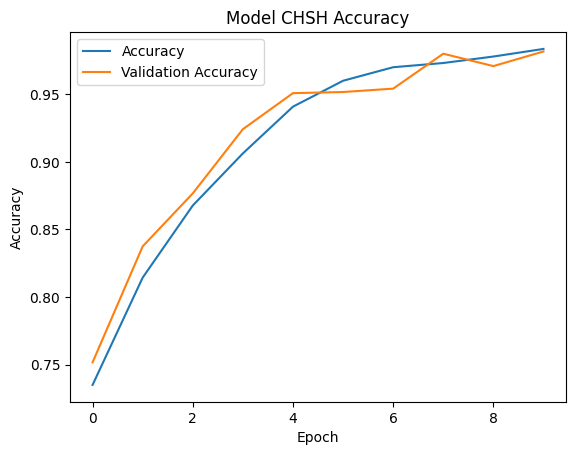

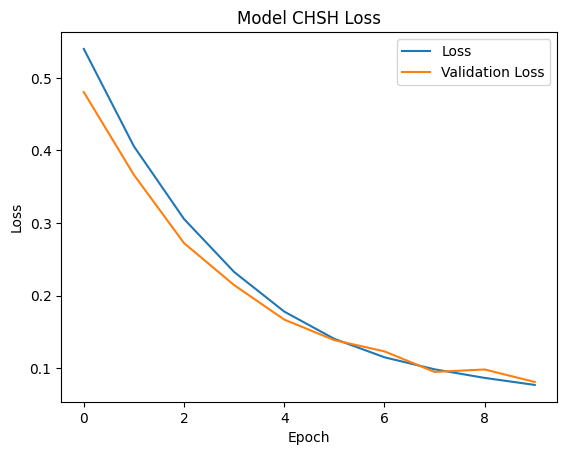

In [5]:
models = {}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in witnesses.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
